In [37]:
import io
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 13]

In [38]:
# get data from CSV
cities_path = "../datasets/cities-data.csv"
names = ["id", "x", "y"]
cities = pd.read_csv(cities_path, names=names, sep=',', header=None, skiprows=1)

print("Cities shape:", cities.shape)
cities.head()

Cities shape: (500, 3)


,id,x,y
0,0,962.0,482.0
1,1,236.0,623.0
2,2,447.0,511.0
3,3,754.0,54.0
4,4,397.0,210.0


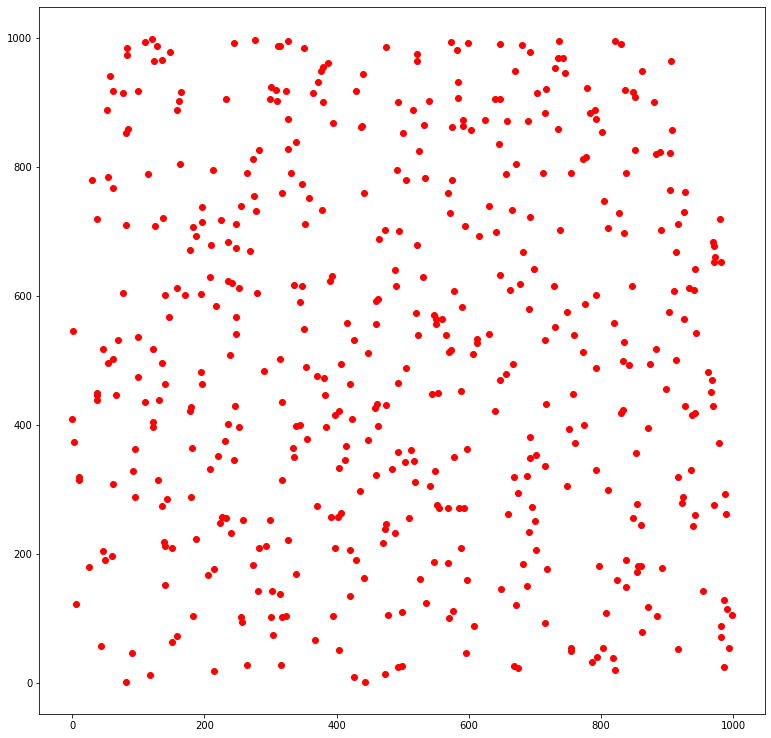

In [39]:
# plot cities
x = cities.iloc[:, 1]
y = cities.iloc[:, 2]
plt.plot(x, y, 'ro')
plt.show()